# <center>  DATA EXPLORATION AND ANALYSIS OF WEATHER AUS DATASET </center> 
__Dataset = weatherAUS__

__Dataset Details:__
* Country Australia
* no of cols (Attributes): 23
* no of rows: 145460


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25-06-2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
data.shape

(145460, 23)

# <center> DATA PREPROCESSING </center> 

__Steps:__
* Handling Type conversions
* Handling Missing Values
* Balancing The Data


### <center> Step 1: Handling Type Conversions </center>

In [6]:
# Handling Object Values in RainToday and RainTomorrow columns to be Boolean Values i.e Yes/No -> 1/0

data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1, 'No':0})

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [7]:
import pandas as pd

# Assuming 'Date' column is in the format 'dd-mm-yyyy'
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original 'Date' column
data.drop('Date', axis=1, inplace=True)

In [8]:
# Checking the data type of all columns:
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

Location: object
MinTemp: float64
MaxTemp: float64
Rainfall: float64
Evaporation: float64
Sunshine: float64
WindGustDir: object
WindGustSpeed: float64
WindDir9am: object
WindDir3pm: object
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Humidity3pm: float64
Pressure9am: float64
Pressure3pm: float64
Cloud9am: float64
Cloud3pm: float64
Temp9am: float64
Temp3pm: float64
RainToday: float64
RainTomorrow: float64
Year: int32
Month: int32
Day: int32


In [9]:
# Performing Label Encoding on categorical columns
encoding_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

label_encoder = LabelEncoder()
for col in encoding_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [10]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,2017,6,21
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,2017,6,22
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,2017,6,23
145458,41,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,2017,6,24


In [11]:
data['RainTomorrow'].unique()

array([ 0.,  1., nan])

##  <center> Step 2: Handling Missing Values </center>

In [12]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

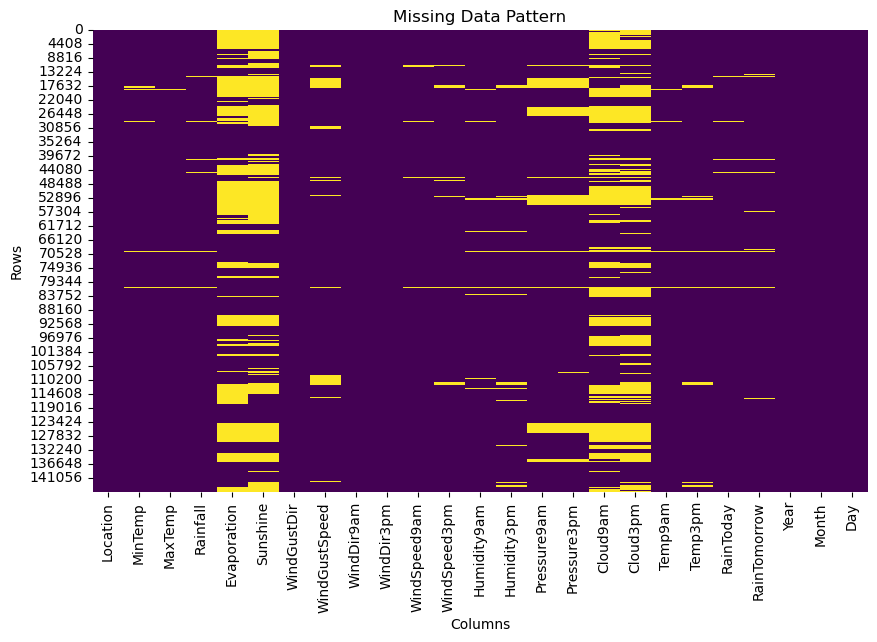

In [13]:
missing_vals = data.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_vals, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

The heat map searches through the dataset and finds possible patterns in the dataset for the missing values
the lighter colored blocks represents the missing values and the darker colored blocks represent the regular data points

In [14]:
# Using mode to Impute categorical Columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [15]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,2017,6,21
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,2017,6,22
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,2017,6,23
145458,41,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,2017,6,24


In [16]:
data['RainTomorrow'].unique()

array([0., 1.])

In [17]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 1: Separate numerical columns from categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
other_categorical_cols = [col for col in data.columns if col not in categorical_cols and col not in numerical_cols]

# Step 2: Apply MICE imputation to numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed_numerical = imputer.fit_transform(data[numerical_cols])
data_imputed_numerical = pd.DataFrame(data_imputed_numerical, columns=numerical_cols)

# Step 3: Concatenate imputed numerical columns with original categorical columns
data_imputed = pd.concat([data_imputed_numerical, data[other_categorical_cols]], axis=1)

In [19]:
# Rearrange columns
data_imputed 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.900000,0.6,6.484195,7.001431,44.000000,20.0,24.0,71.0,22.0,...,1007.1,8.000000,5.121202,16.9,21.8,0.0,0.0,2008,12,1
1,7.4,25.100000,0.0,6.278940,11.029074,44.000000,4.0,22.0,44.0,25.0,...,1007.8,1.853901,2.553898,17.2,24.3,0.0,0.0,2008,12,2
2,12.9,25.700000,0.0,8.681495,11.784566,46.000000,19.0,26.0,38.0,30.0,...,1008.7,2.016364,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,9.2,28.000000,0.0,6.777574,11.395051,24.000000,11.0,9.0,45.0,16.0,...,1012.8,1.236367,2.068572,18.1,26.5,0.0,0.0,2008,12,4
4,17.5,32.300000,1.0,7.437996,5.751086,41.000000,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.274998,10.430861,31.000000,13.0,11.0,51.0,24.0,...,1020.3,1.510747,2.321477,10.1,22.4,0.0,0.0,2017,6,21
145456,3.6,25.300000,0.0,5.325767,11.037554,22.000000,13.0,9.0,56.0,21.0,...,1019.1,1.374023,1.981824,10.9,24.5,0.0,0.0,2017,6,22
145457,5.4,26.900000,0.0,6.216570,10.543061,37.000000,9.0,9.0,53.0,24.0,...,1016.8,1.719743,2.447367,12.5,26.1,0.0,0.0,2017,6,23
145458,7.8,27.000000,0.0,6.740996,10.484506,28.000000,13.0,7.0,51.0,24.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [20]:
data.update(data_imputed)

In [21]:
data['RainTomorrow'].unique()

array([0., 1.])

In [22]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.900000,0.6,6.484195,7.001431,13,44.000000,13,14,...,1007.1,8.000000,5.121202,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,25.100000,0.0,6.278940,11.029074,14,44.000000,6,15,...,1007.8,1.853901,2.553898,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,25.700000,0.0,8.681495,11.784566,15,46.000000,13,15,...,1008.7,2.016364,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,28.000000,0.0,6.777574,11.395051,4,24.000000,9,0,...,1012.8,1.236367,2.068572,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,32.300000,1.0,7.437996,5.751086,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.274998,10.430861,0,31.000000,9,1,...,1020.3,1.510747,2.321477,10.1,22.4,0.0,0.0,2017,6,21
145456,41,3.6,25.300000,0.0,5.325767,11.037554,6,22.000000,9,3,...,1019.1,1.374023,1.981824,10.9,24.5,0.0,0.0,2017,6,22
145457,41,5.4,26.900000,0.0,6.216570,10.543061,3,37.000000,9,14,...,1016.8,1.719743,2.447367,12.5,26.1,0.0,0.0,2017,6,23
145458,41,7.8,27.000000,0.0,6.740996,10.484506,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [23]:
data['AvgTemp'] = (data['Temp9am'] + data['Temp3pm']) / 2

# Calculate the average pressure between Pressure9am and Pressure3pm
data['AvgPressure'] = (data['Pressure9am'] + data['Pressure3pm']) / 2

In [24]:
# Rearrange columns
data = data[['Day', 'Month', 'Year','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 
             'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
             'Cloud9am', 'Cloud3pm', 'AvgTemp', 'AvgPressure', 'RainToday', 'RainTomorrow']]


In [25]:
data

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,AvgTemp,AvgPressure,RainToday,RainTomorrow
0,1,12,2008,2,13.4,22.900000,0.6,6.484195,7.001431,13,...,20.0,24.0,71.0,22.0,8.000000,5.121202,19.35,1007.40,0.0,0.0
1,2,12,2008,2,7.4,25.100000,0.0,6.278940,11.029074,14,...,4.0,22.0,44.0,25.0,1.853901,2.553898,20.75,1009.20,0.0,0.0
2,3,12,2008,2,12.9,25.700000,0.0,8.681495,11.784566,15,...,19.0,26.0,38.0,30.0,2.016364,2.000000,22.10,1008.15,0.0,0.0
3,4,12,2008,2,9.2,28.000000,0.0,6.777574,11.395051,4,...,11.0,9.0,45.0,16.0,1.236367,2.068572,22.30,1015.20,0.0,0.0
4,5,12,2008,2,17.5,32.300000,1.0,7.437996,5.751086,13,...,7.0,20.0,82.0,33.0,7.000000,8.000000,23.75,1008.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21,6,2017,41,2.8,23.400000,0.0,5.274998,10.430861,0,...,13.0,11.0,51.0,24.0,1.510747,2.321477,16.25,1022.45,0.0,0.0
145456,22,6,2017,41,3.6,25.300000,0.0,5.325767,11.037554,6,...,13.0,9.0,56.0,21.0,1.374023,1.981824,17.70,1021.30,0.0,0.0
145457,23,6,2017,41,5.4,26.900000,0.0,6.216570,10.543061,3,...,9.0,9.0,53.0,24.0,1.719743,2.447367,19.30,1018.90,0.0,0.0
145458,24,6,2017,41,7.8,27.000000,0.0,6.740996,10.484506,9,...,13.0,7.0,51.0,24.0,3.000000,2.000000,20.55,1017.95,0.0,0.0


## <center>Step 3: Balancing The Data </center>
* method used Oversampling of minority classes

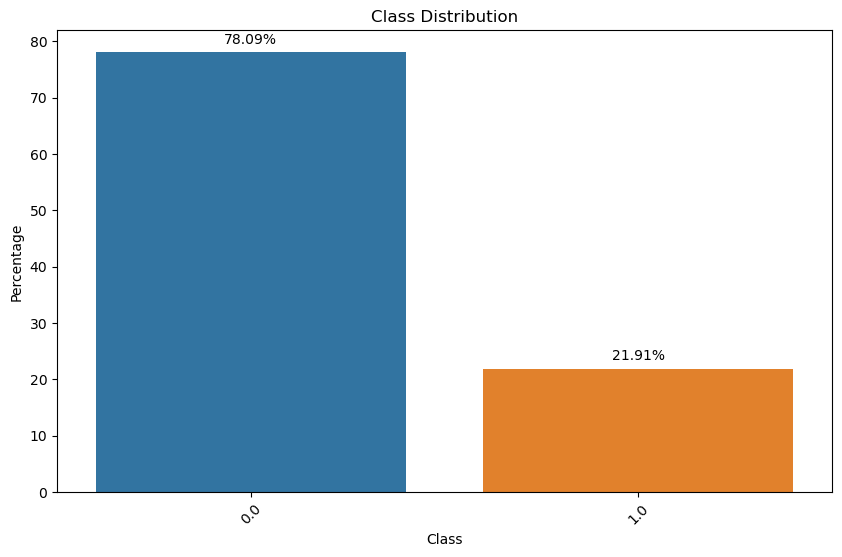

In [26]:
class_distribution = data['RainTomorrow'].value_counts(normalize=True) * 100

# Plotting to check for percentage of imabalance of data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed

# Adding percentage labels
for i, v in enumerate(class_distribution.values):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop("RainTomorrow", axis=1)
y = data["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 90911, 1.0: 90911}


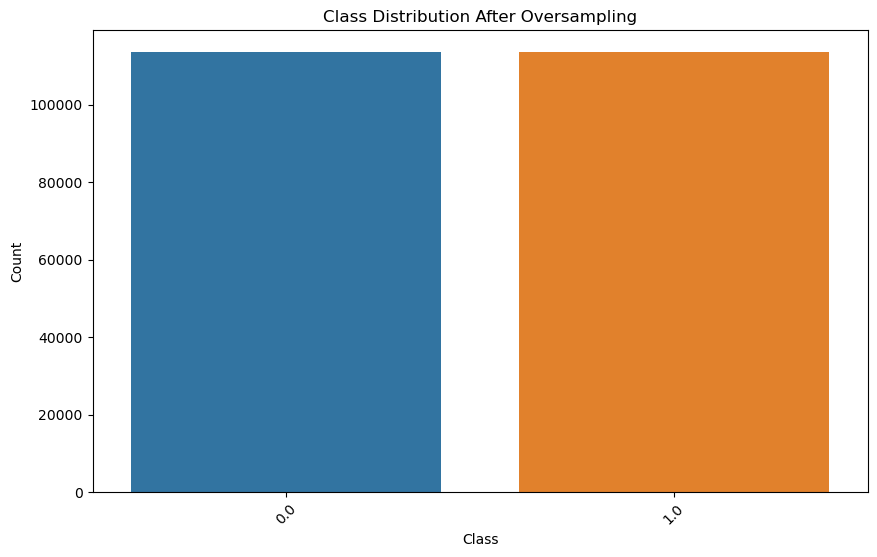

In [29]:
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

oversample = RandomOverSampler(sampling_strategy='minority')

X_resampled, y_resampled = oversample.fit_resample(X, y)

df_resampled = X_resampled.copy()
df_resampled['RainTomorrow'] = y_resampled

class_distribution_resampled = df_resampled['RainTomorrow'].value_counts()

# Plotting to check balancing results
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution_resampled.index, y=class_distribution_resampled.values)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

In [30]:
df_resampled

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,AvgTemp,AvgPressure,RainToday,RainTomorrow
0,1,12,2008,2,13.4,22.9,0.6,6.484195,7.001431,13,...,20.0,24.0,71.0,22.0,8.000000,5.121202,19.35,1007.40,0.0,0.0
1,2,12,2008,2,7.4,25.1,0.0,6.278940,11.029074,14,...,4.0,22.0,44.0,25.0,1.853901,2.553898,20.75,1009.20,0.0,0.0
2,3,12,2008,2,12.9,25.7,0.0,8.681495,11.784566,15,...,19.0,26.0,38.0,30.0,2.016364,2.000000,22.10,1008.15,0.0,0.0
3,4,12,2008,2,9.2,28.0,0.0,6.777574,11.395051,4,...,11.0,9.0,45.0,16.0,1.236367,2.068572,22.30,1015.20,0.0,0.0
4,5,12,2008,2,17.5,32.3,1.0,7.437996,5.751086,13,...,7.0,20.0,82.0,33.0,7.000000,8.000000,23.75,1008.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227161,28,2,2014,40,14.9,18.3,0.0,4.108638,3.813585,4,...,9.0,9.0,72.0,66.0,6.333045,5.841488,16.90,1022.00,0.0,1.0
227162,2,6,2009,44,8.4,14.5,0.6,0.200000,0.000000,1,...,6.0,6.0,100.0,78.0,8.000000,8.000000,11.75,1028.00,0.0,1.0
227163,1,12,2015,9,10.4,35.0,0.0,9.900311,8.758117,7,...,4.0,41.0,34.0,16.0,3.361537,8.000000,27.20,1008.55,0.0,1.0
227164,25,6,2010,15,8.5,17.5,0.0,1.000000,0.400000,3,...,6.0,13.0,78.0,87.0,7.000000,8.000000,13.30,1011.40,0.0,1.0


In [31]:
#EXPORTING CLEANED DATASET
df_resampled.to_csv("cleaned_data.csv")

# <center>DATA VISUALIZATION</center>

In [32]:
data = pd.read_csv('cleaned_data.csv')

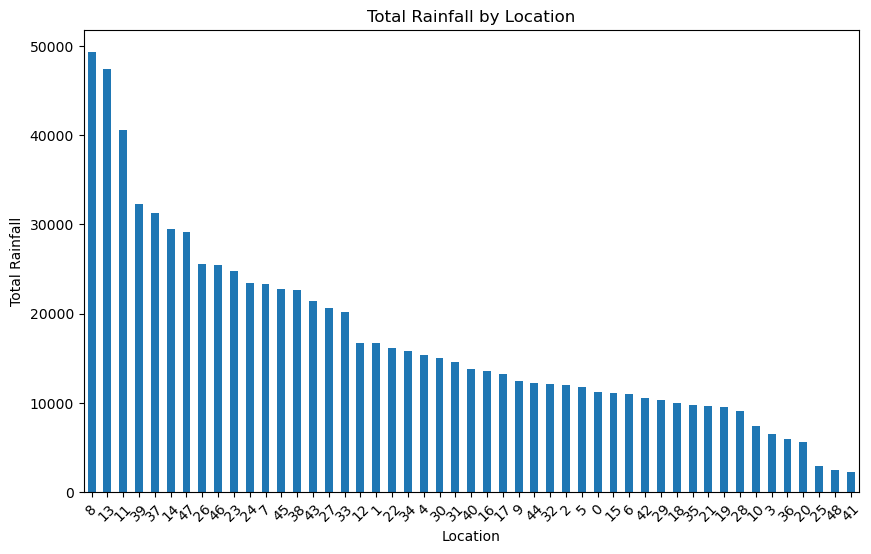

In [33]:
# Plotting of AvgTemp vs Date
plt.figure(figsize=(10, 6))
total_rainfall = data.groupby('Location')['Rainfall'].sum().sort_values(ascending=False)
total_rainfall.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Location')
plt.xticks(rotation=45)
plt.show()

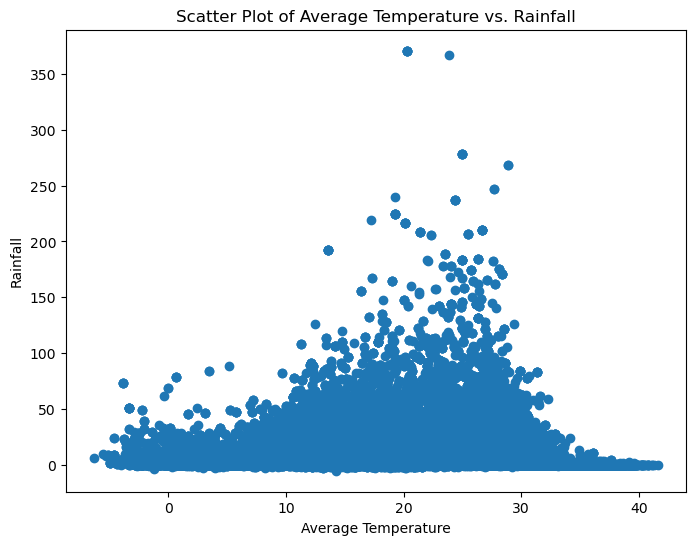

In [34]:
### Plotting of Rainfall vs AvgTemp
plt.figure(figsize=(8, 6))
plt.scatter(data['AvgTemp'], data['Rainfall'])
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Scatter Plot of Average Temperature vs. Rainfall')
plt.show()

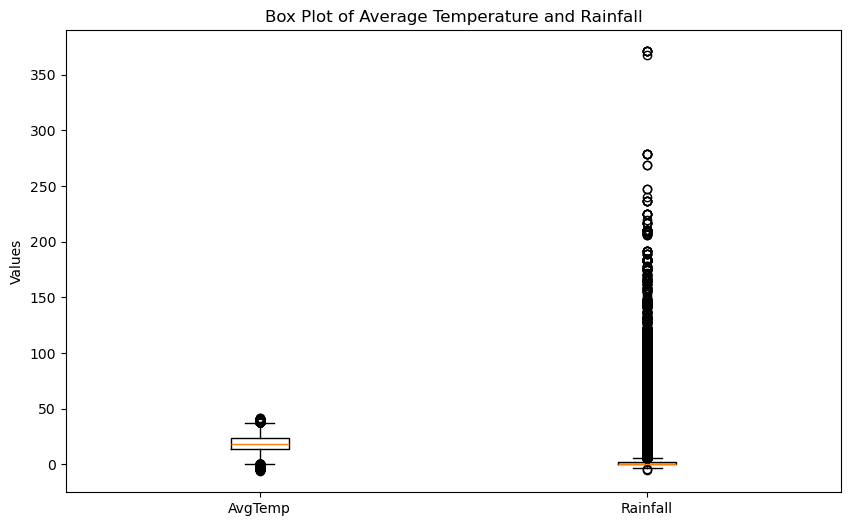

In [35]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['AvgTemp'], data['Rainfall']], labels=['AvgTemp', 'Rainfall'])
plt.ylabel('Values')
plt.title('Box Plot of Average Temperature and Rainfall')
plt.show()

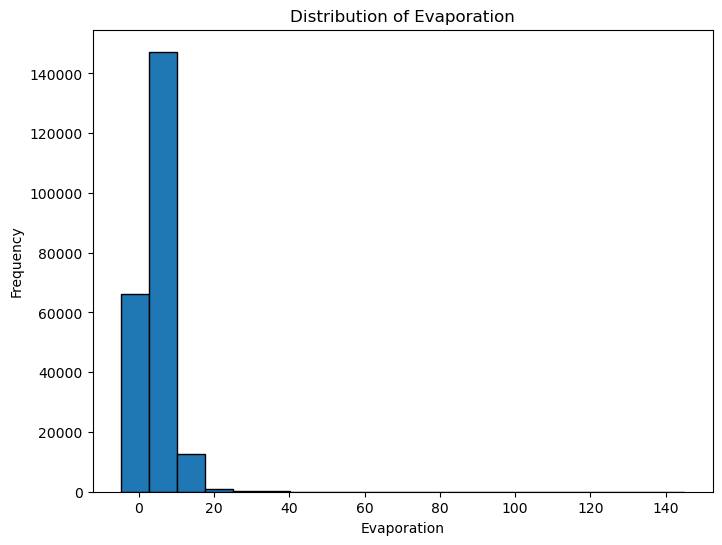

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(data['Evaporation'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Evaporation')
plt.ylabel('Frequency')
plt.title('Distribution of Evaporation')
plt.show()

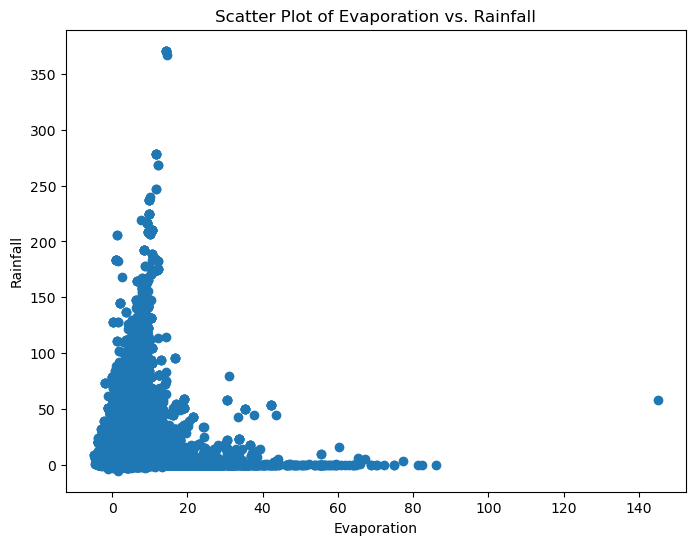

In [37]:
#plot of Evaporation vs Rainfall

plt.figure(figsize=(8, 6))
plt.scatter(data['Evaporation'], data['Rainfall'])
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.title('Scatter Plot of Evaporation vs. Rainfall')
plt.show()

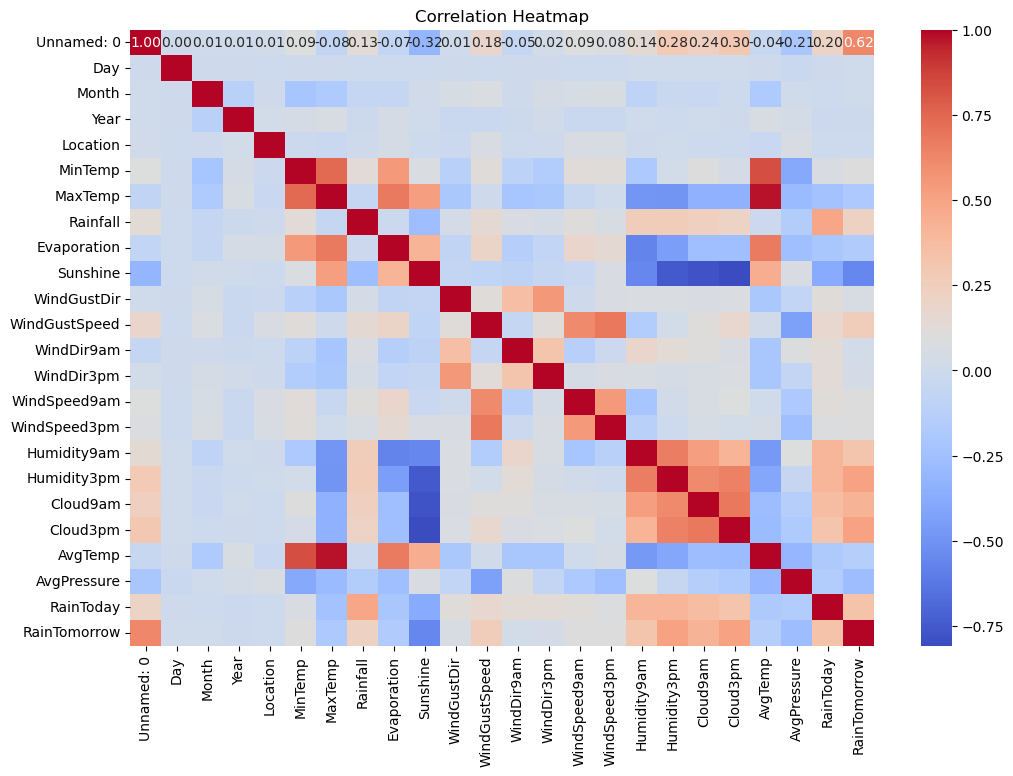

In [38]:
# Heatmap - Correlation between variables
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# <center> MODEL TRAINING  </center>

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop("RainTomorrow", axis=1)
y = data["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: (XGBoost):

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
from xgboost import XGBClassifier
import time

start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)
xgb_kappa = cohen_kappa_score(y_test, xgb_preds)
xgb_training_time = time.time() - start_time

print("Accuracy:", xgb_accuracy)
print("ROC AUC:", xgb_roc_auc)
print("Cohen's Kappa:", xgb_kappa)
print("Training Time (seconds):", xgb_training_time)

Accuracy: 0.9300743936259189
ROC AUC: 0.9821891128053097
Cohen's Kappa: 0.8601856981214676
Training Time (seconds): 4.533106327056885


### Model 2: (CatBoost):

In [41]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, cohen_kappa_score
import time

catboost_model = CatBoostClassifier(verbose=False)

start_time = time.time()

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

end_time = time.time()

cat_training_time = end_time - start_time

catboost_preds = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

cat_accuracy = catboost_model.score(X_test, y_test)
cat_roc_auc = roc_auc_score(y_test, catboost_pred_proba)
cat_kappa = cohen_kappa_score(y_test, catboost_preds)

print("Accuracy:", cat_accuracy)
print("ROC AUC:", cat_roc_auc)
print("Cohen's Kappa:", cat_kappa)
print("Training Time (seconds):", cat_training_time)

Accuracy: 0.9355328608531056
ROC AUC: 0.9843915877029994
Cohen's Kappa: 0.8710976576655324
Training Time (seconds): 43.73199796676636


### Model 3: (LogisticRegression):

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

logistic_model = LogisticRegression(max_iter=5000)

start_time = time.time()

logistic_model.fit(X_train, y_train)

end_time = time.time()

logistic_training_time = end_time - start_time

logistic_preds = logistic_model.predict(X_test)
logistic_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_roc_auc = roc_auc_score(y_test, logistic_pred_proba)
logistic_kappa = cohen_kappa_score(y_test, logistic_preds)

print("Accuracy:", logistic_accuracy)
print("ROC AUC:", logistic_roc_auc)
print("Cohen's Kappa:", logistic_kappa)
print("Training Time (seconds):", logistic_training_time)

Accuracy: 0.8601707972003345
ROC AUC: 0.92854769226605
Cohen's Kappa: 0.720391136647217
Training Time (seconds): 1.2330758571624756


### Model 4: (Decision Tree):

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

dt_model = DecisionTreeClassifier()

start_time = time.time()

dt_model.fit(X_train, y_train)

end_time = time.time()

dt_training_time = end_time - start_time

dt_preds = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)
dt_kappa = cohen_kappa_score(y_test, dt_preds)

print("Accuracy:", dt_accuracy)
print("ROC AUC:", dt_roc_auc)
print("Cohen's Kappa:", dt_kappa)
print("Training Time (seconds):", dt_training_time)

Accuracy: 0.8909407051987498
ROC AUC: 0.8909557367067079
Cohen's Kappa: 0.7818822962883968
Training Time (seconds): 5.146231651306152


### Model 5: (ANN):

In [44]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

num_features = X_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # For regression tasks, use a single neuron in the output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # verbose=0 to suppress training output

end_time = time.time()

ann_training_time = end_time - start_time

ann_preds = model.predict(X_test)
ann_preds = (ann_preds > 0.5).astype(int)  # Convert probabilities to binary predictions

ann_accuracy = accuracy_score(y_test, ann_preds)
ann_roc_auc = roc_auc_score(y_test, ann_preds)
ann_kappa = cohen_kappa_score(y_test, ann_preds)

print("Accuracy:", ann_accuracy)
print("ROC AUC:", ann_roc_auc)
print("Cohen's Kappa:", ann_kappa)
print("Training Time (seconds):", ann_training_time)

1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step
Accuracy: 0.7037020733371484
ROC AUC: 0.7041940890852046
Cohen's Kappa: 0.4079786743957854
Training Time (seconds): 73.27807188034058


### Model 6: (Random Forest):

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

rf_classifier = RandomForestClassifier()

start_time = time.time()

rf_classifier.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time

rf_preds = rf_classifier.predict(X_test)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, rf_preds)
roc_auc = roc_auc_score(y_test, rf_pred_proba)
kappa = cohen_kappa_score(y_test, rf_preds)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Training Time (seconds):", training_time)

Accuracy: 0.9270150107848748
ROC AUC: 0.9816147480864301
Cohen's Kappa: 0.8540872472645242
Training Time (seconds): 82.74033570289612


# <center>OBSERVATIONS AND STATISTICAL EVALUATION</center>

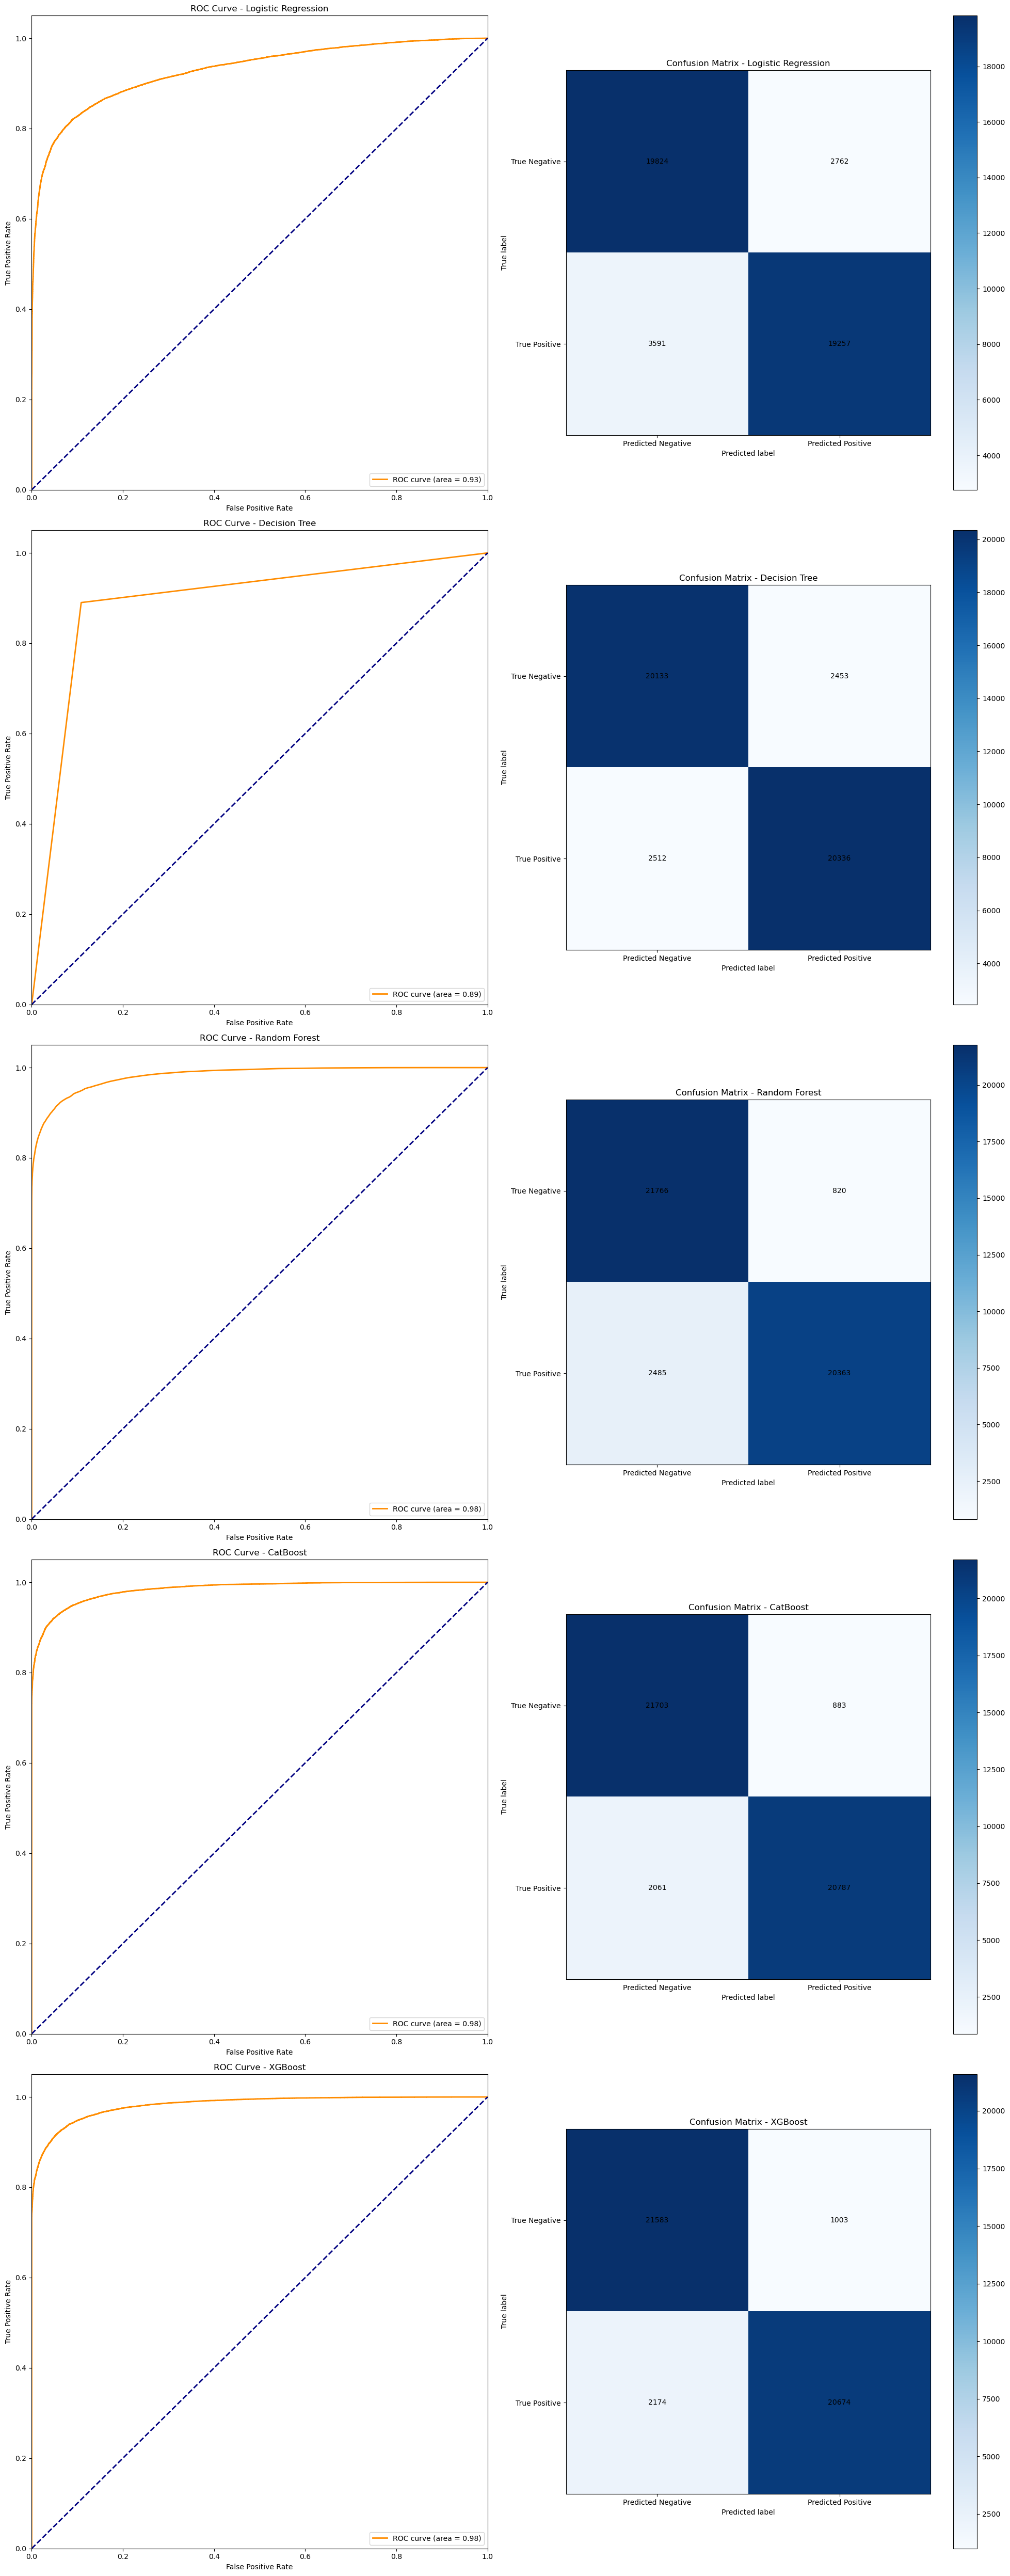

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False), 
    'XGBoost': XGBClassifier()
}

plt.figure(figsize=(20, 50))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(len(models), 2, 2*i-1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(name))
    plt.legend(loc="lower right")
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    
    plt.subplot(len(models), 2, 2*i)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['True Negative', 'True Positive'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

In [47]:
observations = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'CatBoost', 'XGBoost'],
    'Accuracy': [logistic_accuracy, dt_accuracy, ann_accuracy, accuracy , cat_accuracy, xgb_accuracy],
    'ROC_AUC': [logistic_roc_auc, dt_roc_auc, ann_roc_auc, roc_auc , cat_roc_auc, xgb_roc_auc],
    'Cohen\'s Kappa': [logistic_kappa, dt_kappa, ann_kappa, kappa , cat_kappa, xgb_kappa],
    'Training Time (seconds)': [logistic_training_time, dt_training_time, ann_training_time, training_time, cat_training_time,xgb_training_time]
}

df = pd.DataFrame(observations)
df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
2,Neural Network,0.703702,0.704194,0.407979,73.278072
3,Random Forest,0.927015,0.982189,0.854087,82.740336
4,CatBoost,0.935533,0.984392,0.871098,43.731998
5,XGBoost,0.930074,0.982189,0.860186,4.533106


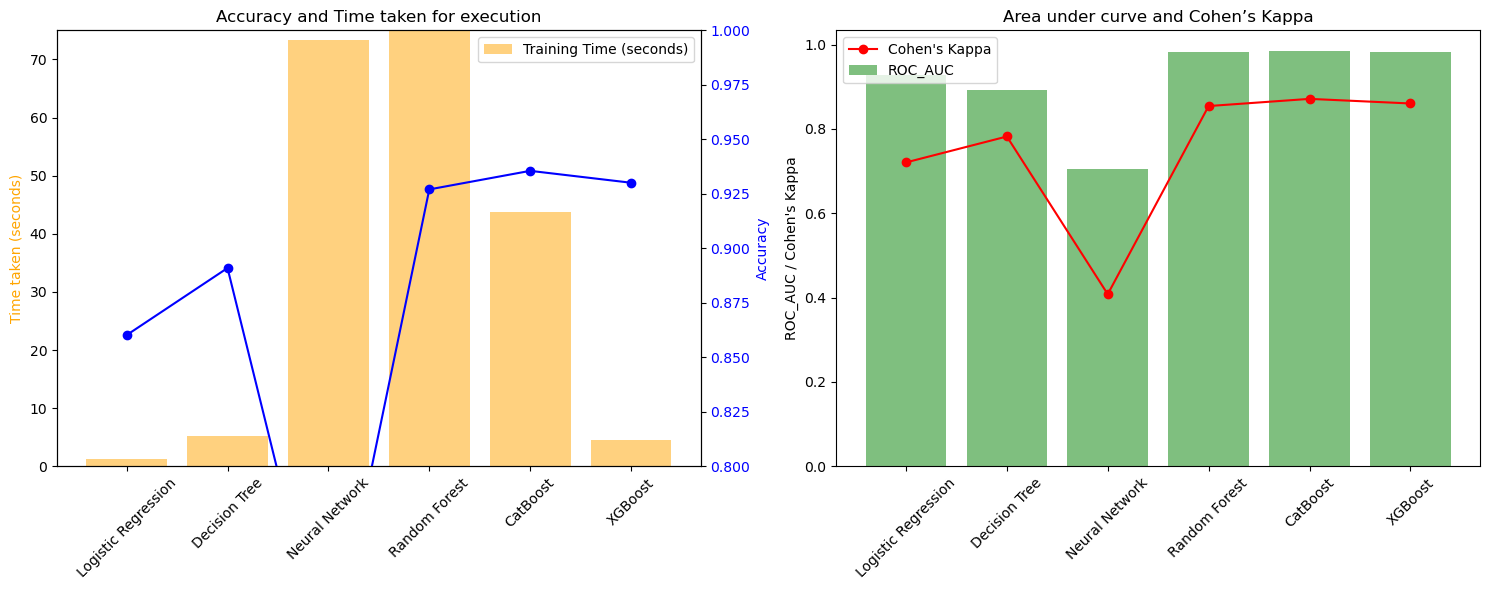

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot Accuracy vs. Time taken with separate y-axes
ax2 = axs[0].twinx()
ax2.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy', color='blue')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([0.8, 1.0]) 

axs[0].bar(df['Model'], df['Training Time (seconds)'], label='Training Time (seconds)', color='orange', alpha=0.5)
axs[0].set_ylabel('Time taken (seconds)', color='orange') 
axs[0].set_title('Accuracy and Time taken for execution')
axs[0].legend()
axs[0].set_ylim([0, 75])

# Plot ROC_AUC vs. Cohen's Kappa
axs[1].bar(df['Model'], df['ROC_AUC'], label='ROC_AUC', color='green', alpha=0.5)
axs[1].plot(df['Model'], df['Cohen\'s Kappa'], marker='o', label='Cohen\'s Kappa', color='red')
axs[1].set_ylabel('ROC_AUC / Cohen\'s Kappa')
axs[1].set_title('Area under curve and Cohen’s Kappa')
axs[1].legend()

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


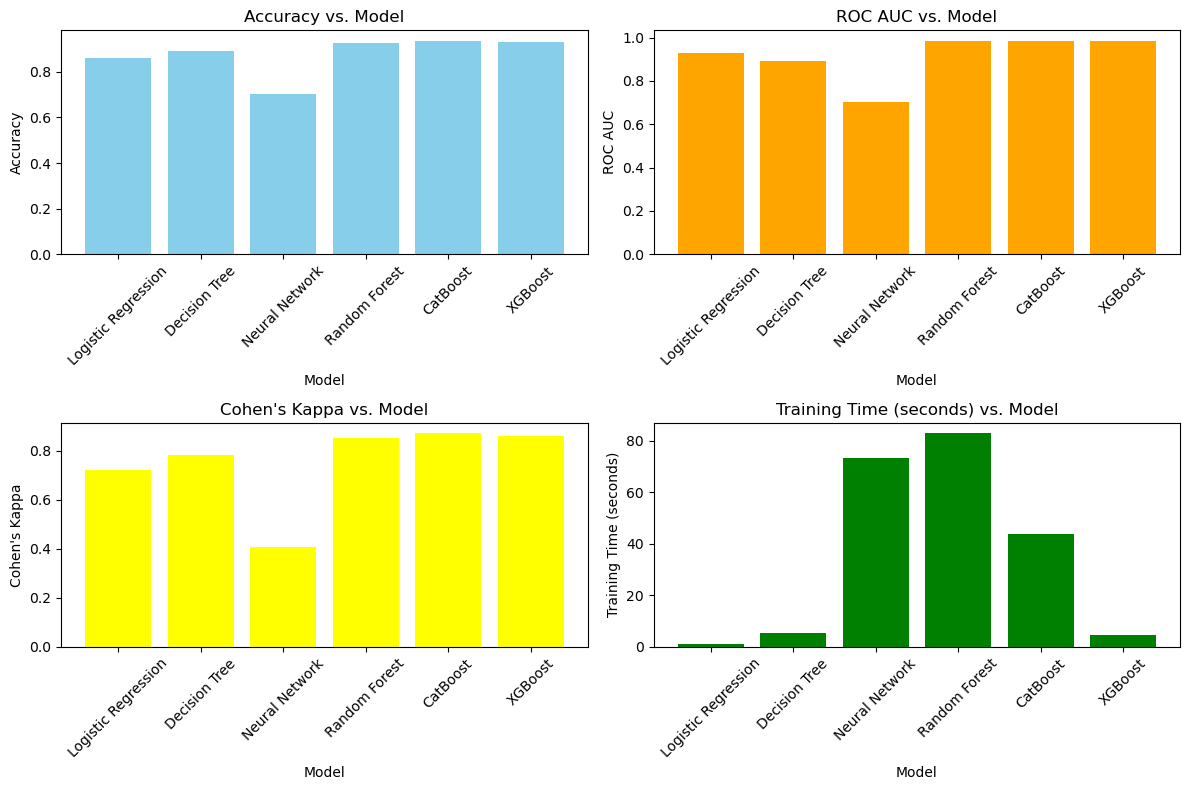

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Accuracy vs. Model
axes[0, 0].bar(df['Model'], df['Accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy vs. Model')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot ROC_AUC vs. Model
axes[0, 1].bar(df['Model'], df['ROC_AUC'], color='orange')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('ROC AUC')
axes[0, 1].set_title('ROC AUC vs. Model')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Cohen's Kappa vs. Model
axes[1, 0].bar(df['Model'], df["Cohen's Kappa"], color='yellow')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel("Cohen's Kappa")
axes[1, 0].set_title("Cohen's Kappa vs. Model")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Training Time (seconds) vs. Model
axes[1, 1].bar(df['Model'], df['Training Time (seconds)'], color='green')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Training Time (seconds) vs. Model')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## <center> Implementing Hybrid Models To test for higher accuracy: </center>

### Hybrid Model 1: (Random Forest Classifier + CatBoost Classifier):

In [50]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

start_time = time.time()

catboost_model = CatBoostClassifier(verbose=False)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

hybrid_pred_proba = (catboost_pred_proba + rf_pred_proba) / 2

hybrid_preds = (hybrid_pred_proba > 0.5).astype(int)

hybrid_accuracy = accuracy_score(y_test, hybrid_preds)
hybrid_roc_auc = roc_auc_score(y_test, hybrid_pred_proba)
hybrid_kappa = cohen_kappa_score(y_test, hybrid_preds)

hybrid_training_time = time.time() - start_time

print("Hybrid Model 1 Metrics (Random Forest + CatBoost):")
print("Accuracy:", hybrid_accuracy)
print("ROC AUC:", hybrid_roc_auc)
print("Cohen's Kappa:", hybrid_kappa)
print("Training Time:", hybrid_training_time, "seconds")

Hybrid Model 1 Metrics (Random Forest + CatBoost):
Accuracy: 0.9345204032222565
ROC AUC: 0.9848519371553632
Cohen's Kappa: 0.8690802876879951
Training Time: 126.89553880691528 seconds


### Hybrid Model 2: (Random Forest Classifier + XGBoost Classifier):

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

start_time = time.time()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

hybrid_pred_proba = (rf_pred_proba + xgb_pred_proba) / 2

hybrid_preds = (hybrid_pred_proba > 0.5).astype(int)

hybrid2_accuracy = accuracy_score(y_test, hybrid_preds)
hybrid2_roc_auc = roc_auc_score(y_test, hybrid_pred_proba)
hybrid2_kappa = cohen_kappa_score(y_test, hybrid_preds)

hybrid2_training_time = time.time() - start_time

print("Hybrid Model 2 Metrics (Random Forest + XGBoost):")
print("Accuracy:", hybrid2_accuracy)
print("ROC AUC:", hybrid2_roc_auc)
print("Cohen's Kappa:", hybrid2_kappa)
print("Training Time:", hybrid2_training_time, "seconds")

Hybrid Model 2 Metrics (Random Forest + XGBoost):
Accuracy: 0.9312849407932385
ROC AUC: 0.9833558833078969
Cohen's Kappa: 0.8626148349401168
Training Time: 91.14601445198059 seconds


### Updated Observations to include Hybrid Models:

In [52]:
observations = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'CatBoost', 'XGBoost', 'Hybrid Model 1', 'Hybrid Model 2'],
    'Accuracy': [logistic_accuracy, dt_accuracy, ann_accuracy, accuracy , cat_accuracy, xgb_accuracy, hybrid_accuracy, hybrid2_accuracy],
    'ROC_AUC': [logistic_roc_auc, dt_roc_auc, ann_roc_auc, roc_auc , cat_roc_auc, xgb_roc_auc, hybrid_roc_auc, hybrid2_roc_auc],
    'Cohen\'s Kappa': [logistic_kappa, dt_kappa, ann_kappa, kappa , cat_kappa, xgb_kappa, hybrid_kappa, hybrid2_kappa],
    'Training Time (seconds)': [logistic_training_time, dt_training_time, ann_training_time, training_time, cat_training_time, xgb_training_time, hybrid_training_time, hybrid2_training_time]
}

df = pd.DataFrame(observations)
df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
2,Neural Network,0.703702,0.704194,0.407979,73.278072
3,Random Forest,0.927015,0.982189,0.854087,82.740336
4,CatBoost,0.935533,0.984392,0.871098,43.731998
5,XGBoost,0.930074,0.982189,0.860186,4.533106
6,Hybrid Model 1,0.934520,0.984852,0.869080,126.895539
7,Hybrid Model 2,0.931285,0.983356,0.862615,91.146014


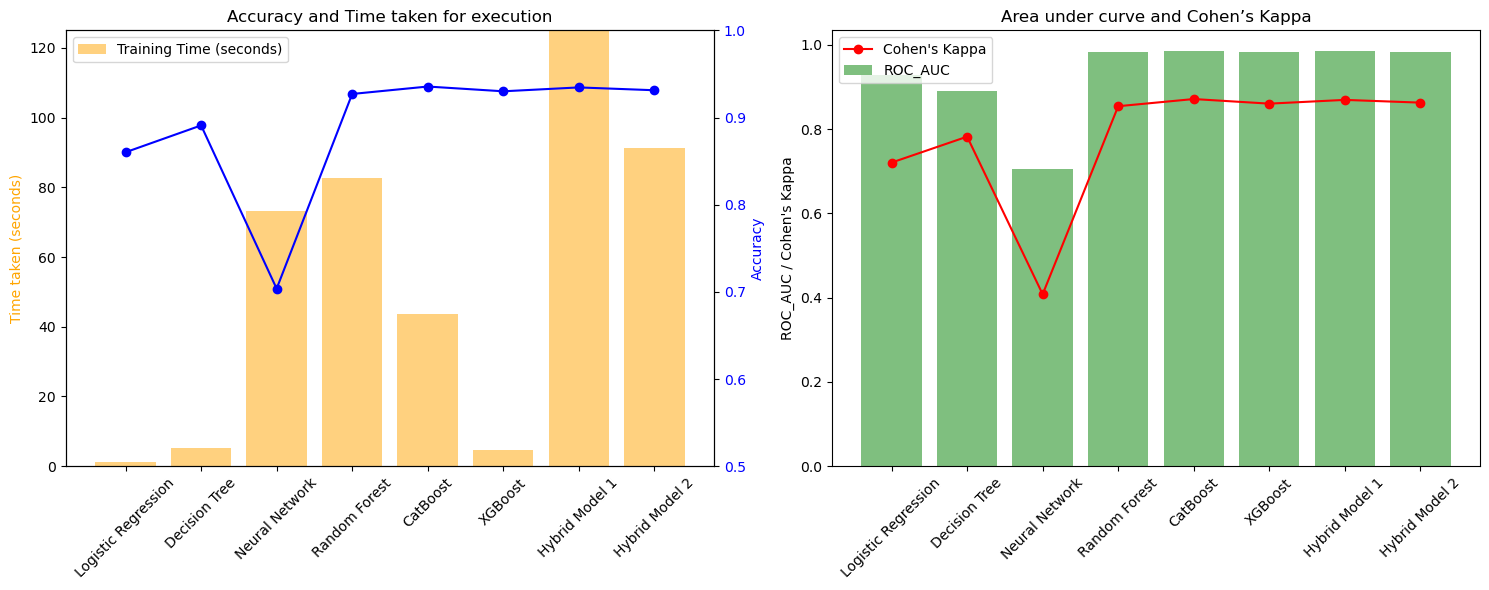

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot Accuracy vs. Time taken with separate y-axes
ax2 = axs[0].twinx()
ax2.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy', color='blue')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([0.5, 1.0]) 

axs[0].bar(df['Model'], df['Training Time (seconds)'], label='Training Time (seconds)', color='orange', alpha=0.5)
axs[0].set_ylabel('Time taken (seconds)', color='orange') 
axs[0].set_title('Accuracy and Time taken for execution')
axs[0].legend()
axs[0].set_ylim([0, 125])

# Plot ROC_AUC vs. Cohen's Kappa
axs[1].bar(df['Model'], df['ROC_AUC'], label='ROC_AUC', color='green', alpha=0.5)
axs[1].plot(df['Model'], df['Cohen\'s Kappa'], marker='o', label='Cohen\'s Kappa', color='red')
axs[1].set_ylabel('ROC_AUC / Cohen\'s Kappa')
axs[1].set_title('Area under curve and Cohen’s Kappa')
axs[1].legend()

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


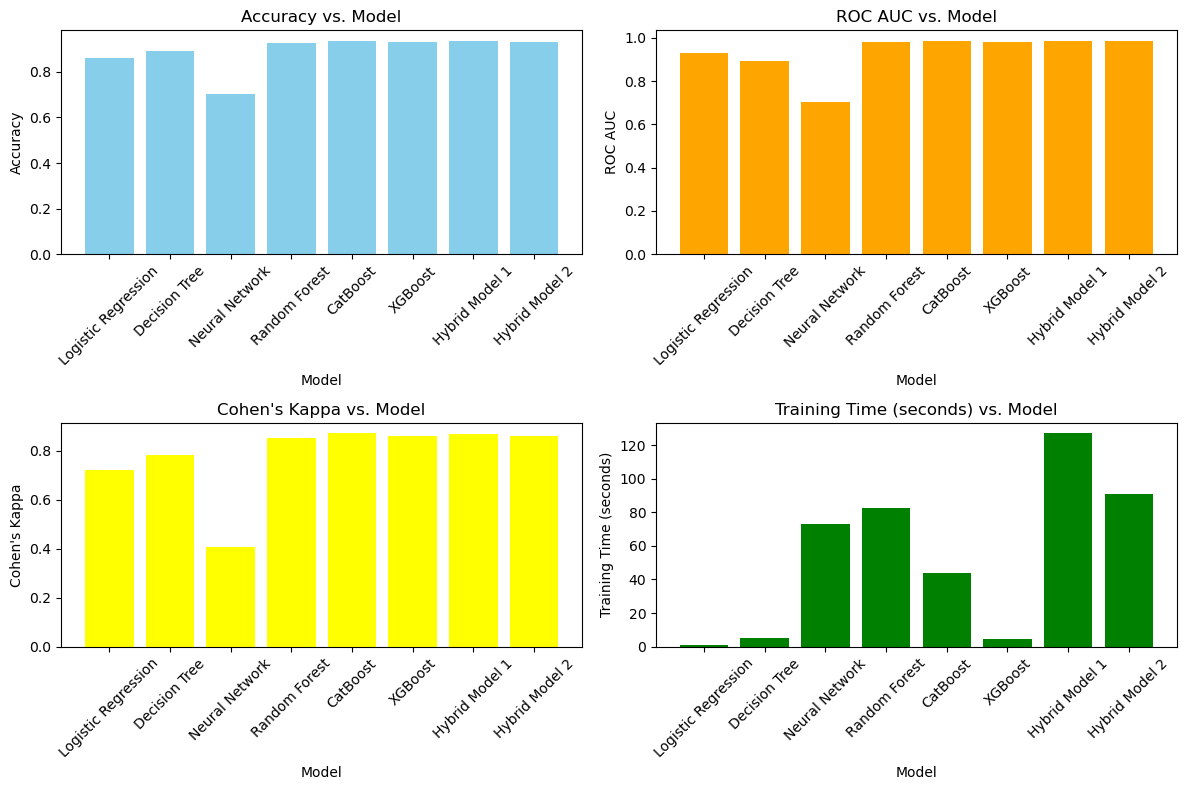

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Accuracy vs. Model
axes[0, 0].bar(df['Model'], df['Accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy vs. Model')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot ROC_AUC vs. Model
axes[0, 1].bar(df['Model'], df['ROC_AUC'], color='orange')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('ROC AUC')
axes[0, 1].set_title('ROC AUC vs. Model')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Cohen's Kappa vs. Model
axes[1, 0].bar(df['Model'], df["Cohen's Kappa"], color='yellow')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel("Cohen's Kappa")
axes[1, 0].set_title("Cohen's Kappa vs. Model")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Training Time (seconds) vs. Model
axes[1, 1].bar(df['Model'], df['Training Time (seconds)'], color='green')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Training Time (seconds) vs. Model')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [55]:
#Sorting on the basis of Accuracy 
acc_df = df.sort_values(by='Accuracy', ascending=False)

acc_df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
4,CatBoost,0.935533,0.984392,0.871098,43.731998
6,Hybrid Model 1,0.934520,0.984852,0.869080,126.895539
7,Hybrid Model 2,0.931285,0.983356,0.862615,91.146014
5,XGBoost,0.930074,0.982189,0.860186,4.533106
3,Random Forest,0.927015,0.982189,0.854087,82.740336
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076
2,Neural Network,0.703702,0.704194,0.407979,73.278072


In [56]:
#Sorting on the basis of ROC_AUC 
roc_df = df.sort_values(by='ROC_AUC', ascending=False)

roc_df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
6,Hybrid Model 1,0.934520,0.984852,0.869080,126.895539
4,CatBoost,0.935533,0.984392,0.871098,43.731998
7,Hybrid Model 2,0.931285,0.983356,0.862615,91.146014
3,Random Forest,0.927015,0.982189,0.854087,82.740336
5,XGBoost,0.930074,0.982189,0.860186,4.533106
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
2,Neural Network,0.703702,0.704194,0.407979,73.278072


In [57]:
#Sorting on the basis of Cohen's Kappa	 
kappa_df = df.sort_values(by='Cohen\'s Kappa', ascending=False)

kappa_df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
4,CatBoost,0.935533,0.984392,0.871098,43.731998
6,Hybrid Model 1,0.934520,0.984852,0.869080,126.895539
7,Hybrid Model 2,0.931285,0.983356,0.862615,91.146014
5,XGBoost,0.930074,0.982189,0.860186,4.533106
3,Random Forest,0.927015,0.982189,0.854087,82.740336
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076
2,Neural Network,0.703702,0.704194,0.407979,73.278072


In [58]:
#Sorting on the basis of Training Time (seconds)	 
tt_df = df.sort_values(by='Training Time (seconds)', ascending=False)

tt_df

,Model,Accuracy,ROC_AUC,Cohen's Kappa,Training Time (seconds)
6,Hybrid Model 1,0.934520,0.984852,0.869080,126.895539
7,Hybrid Model 2,0.931285,0.983356,0.862615,91.146014
3,Random Forest,0.927015,0.982189,0.854087,82.740336
2,Neural Network,0.703702,0.704194,0.407979,73.278072
4,CatBoost,0.935533,0.984392,0.871098,43.731998
1,Decision Tree,0.890941,0.890956,0.781882,5.146232
5,XGBoost,0.930074,0.982189,0.860186,4.533106
0,Logistic Regression,0.860171,0.928548,0.720391,1.233076


### FINAL OBSERVATIONS:

* __CatBoost and Hybrid Model 1__ appear to have the highest performance based on accuracy, ROC AUC, and Cohen's Kappa. CatBoost has a slightly higher accuracy and ROC AUC compared to Hybrid Model 1, but Hybrid Model 1 has a higher Cohen's Kappa.

* __XGBoost__ also performs well with high accuracy and ROC AUC, but it has a significantly lower training time compared to the other models, indicating efficiency in training.

### CONCLUSION:
Given our intention to integrate an XAI model in the future, our priority is to select a model that strikes a balance between performance and interpretability. While XGBoost boasts significantly lower training times, Hybrid Model 1 (Random Forest + CatBoost) emerges as the preferred choice despite its slightly longer training duration. This decision stems from the understanding that Hybrid Model 1 not only offers competitive performance metrics but also provides enhanced interpretability, particularly due to the inclusion of Random Forest. This interpretability is vital for our future integration of XAI techniques, as it enables a deeper understanding of the model's decision-making process. Therefore, opting for Hybrid Model 1 aligns with our objectives of ensuring both strong performance and interpretability, facilitating the seamless integration of XAI in our project.